In [2]:
# %load defaults.ipy
from numpy import *
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 600
%matplotlib inline

import matplotlib.pyplot as plt

import sys
sys.path.append('../python')
import plot_info
from plot_info import showAndSave
import netCDF4
from IPython.core.display import display, HTML
import matplotlib2tikz

import json

with open('structure_function_configs.json') as f:
    configurations = json.load(f)

def for_each_config(f):
    for conf in configurations:
        f(conf)
plot_info.set_notebook_name("StructureAlsvinn.ipynb")

/usr/lib/python3.7/site-packages/ipykernel_launcher.py


In [42]:
def headline(text):
    display(HTML("<h1>%s</h1>"%text))
def h2(text):
    display(HTML("<h2>%s</h2>"%text))
def h3(text):
    display(HTML("<h3>%s</h3>"%text))
def h4(text):
    display(HTML("<h4>%s</h4>"%text))
def h5(text):
    display(HTML("<h4>%s</h4>"%text))

In [50]:
def readnetcdf4(filename, variable):
    basepath = plot_info.get_environment("STATISTICAL_STRUCTURE", [filename])
    with netCDF4.Dataset(os.path.join(basepath, filename)) as f:
        return f.variables[variable][:,0,0]

def upscale(d, r):

    while d.shape[0] < r:
       
        d = repeat(d,2,0)
    return d

def plotscalings_perturbation(d,pert, title,plot_nonlog=True,name=''):
    N = len(d)
    H = linspace(0, 64./2048,N)
   
    poly = polyfit(log(H[1:]),log(d[1:]),1)
  
  
        
    fig = plt.figure(0,figsize=2*plt.figaspect(0.9))
    plt.title(title)
    ax = plt.gca()
    ax.loglog(H,d,label='%s $\\epsilon=%.4f$'%(name, pert))
    ax.loglog(H, exp(poly[1])*H**(poly[0]), '--',label='$\\mathcal{O}(h^{%.2f})$' % poly[0])
    box = ax.get_position()
    #ax.set_position([box.x0, box.y0 + box.height * 0.1,
    #                 box.width, box.height * 0.9])
    #
    ## Put a legend below current axis
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    #      fancybox=True, shadow=True, ncol=5)
    ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    ax.grid('on')



def plotscalings(d,r,title,plot_nonlog=True):
    N = len(d)
    H = linspace(0, 64./2048,N)
   
    poly = polyfit(log(H[1:]),log(d[1:]),1)
    if plot_nonlog:
        fig = plt.figure(0, figsize=2*plt.figaspect(0.5))
        fig.suptitle(title)
        ax = fig.add_subplot(1,2,1)
        
        ax.plot(H,d,label='r=%d'%r)
        ax.plot(H, exp(poly[1])*H**(poly[0]), '--',label='$\\mathcal{O}(h^{%.2f})$' % poly[0])
        ax.grid('on')
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])
        
        # Put a legend below current axis
        #ax.legend(pos='upper center', bbox_to_anchor=(0.5, -0.05),
        #     fancybox=True, shadow=True, ncol=5)
        
        ax.legend(bbox_to_anchor=(0.5, -0.05),
             fancybox=True, shadow=True, ncol=5)
        
    
          

        ax = fig.add_subplot(1,2,2)
    else:
        
        fig = plt.figure(0,figsize=2*plt.figaspect(0.9))
        plt.title(title)
        ax = plt.gca()
    ax.loglog(H,d,label='$N=%d$'%r)
    ax.loglog(H, exp(poly[1])*H**(poly[0]), '--',label='$\\mathcal{O}(h^{%.2f})$' % poly[0])
    box = ax.get_position()
    #ax.set_position([box.x0, box.y0 + box.height * 0.1,
    #                 box.width, box.height * 0.9])
    #
    ## Put a legend below current axis
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    #      fancybox=True, shadow=True, ncol=5)
    ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    ax.grid('on')




def getlineintegral(filename, variable,resolution):
    d = readnetcdf4(filename, variable)
    dx = 1.0/resolution
    
    for h in range(1,len(d)):
        d[h] += d[h-1]
    for h in range(1,len(d)):
        d[h] /=(2*h+1)**2
        #d[h] /= 4*(2*h+1)
        
    return d
    

# Mean and variance

Saving mean_Richtmeyer-Meshkov_64_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


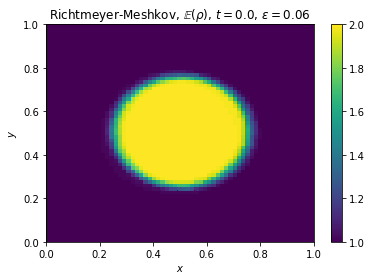

Saving mean_Richtmeyer-Meshkov_128_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


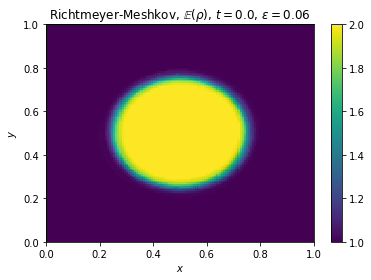

Saving mean_Richtmeyer-Meshkov_256_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


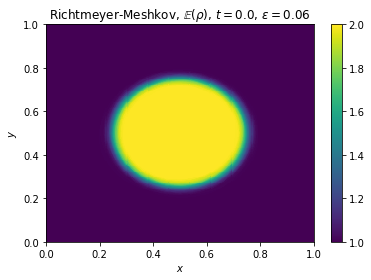

Saving mean_Richtmeyer-Meshkov_512_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


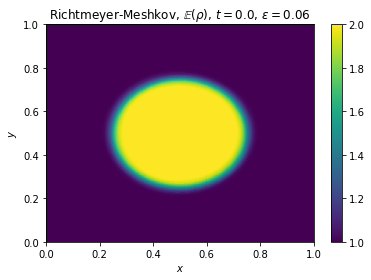

Saving mean_Richtmeyer-Meshkov_1024_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


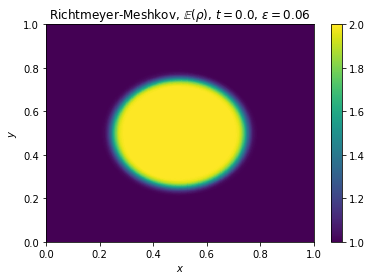

[ 0.11049652  0.05546999  0.03097419  0.01259892]
Saving convergence_mean_Richtmeyer-Meshkov_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


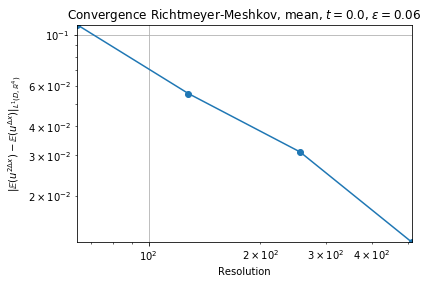

Saving variance_Richtmeyer-Meshkov_64_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


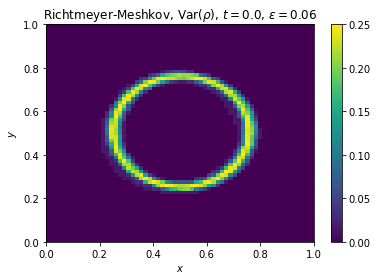

Saving variance_Richtmeyer-Meshkov_128_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


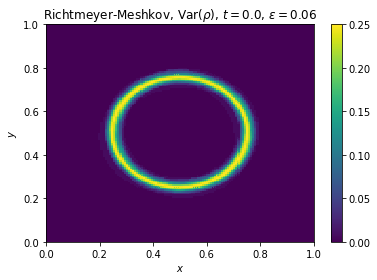

Saving variance_Richtmeyer-Meshkov_256_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


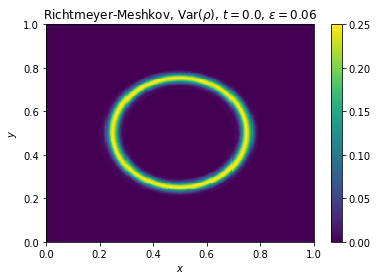

Saving variance_Richtmeyer-Meshkov_512_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


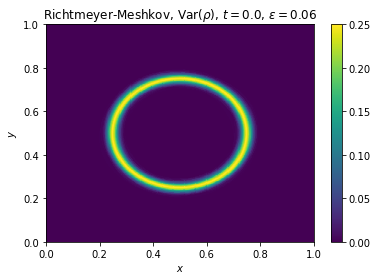

Saving variance_Richtmeyer-Meshkov_1024_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


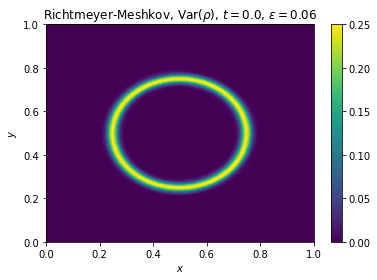

[ 0.00323374  0.00170469  0.00100335  0.00056004]
Saving convergence_variance_Richtmeyer-Meshkov_00600_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


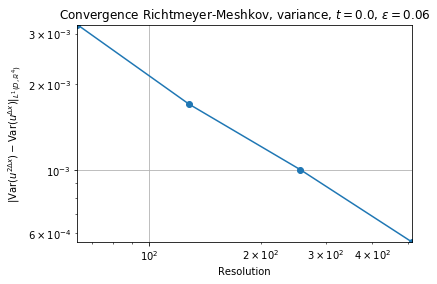

Saving mean_Richtmeyer-Meshkov_64_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


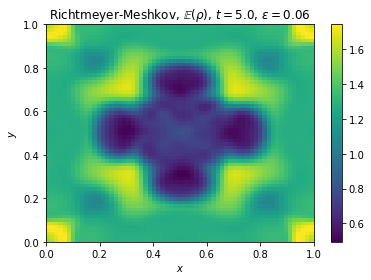

Saving mean_Richtmeyer-Meshkov_128_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


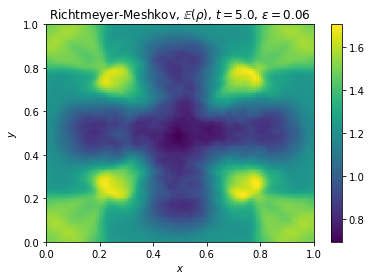

Saving mean_Richtmeyer-Meshkov_256_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


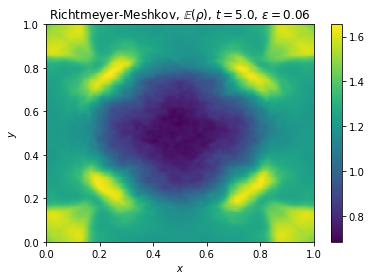

Saving mean_Richtmeyer-Meshkov_512_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


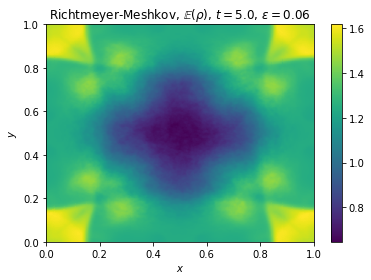

Saving mean_Richtmeyer-Meshkov_1024_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


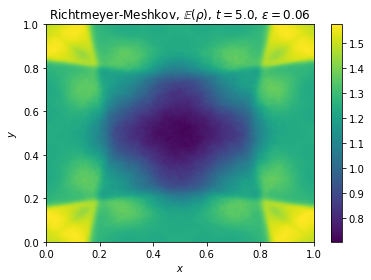

[ 0.66675913  0.32557386  0.11661378  0.12915784]
Saving convergence_mean_Richtmeyer-Meshkov_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


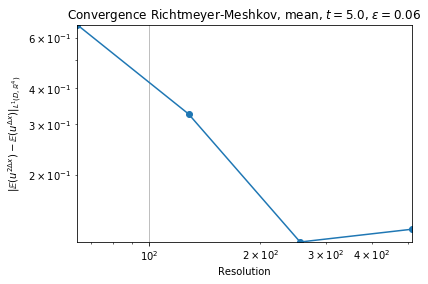

Saving variance_Richtmeyer-Meshkov_64_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


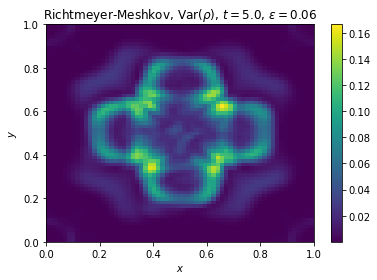

Saving variance_Richtmeyer-Meshkov_128_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


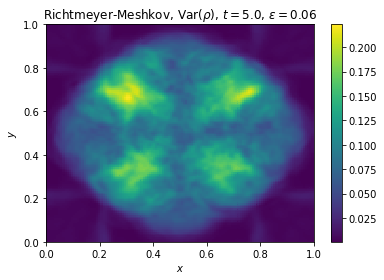

Saving variance_Richtmeyer-Meshkov_256_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


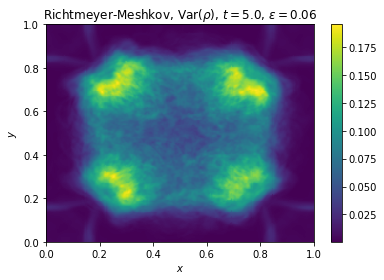

Saving variance_Richtmeyer-Meshkov_512_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


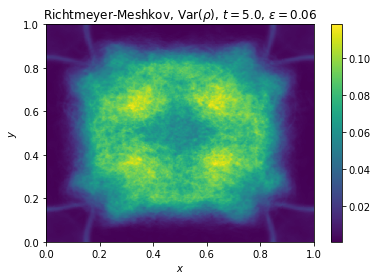

Saving variance_Richtmeyer-Meshkov_1024_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


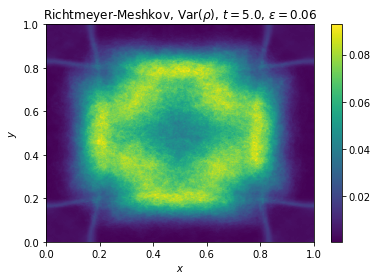

[ 0.09453454  0.06214285  0.02998009  0.0311235 ]
Saving convergence_variance_Richtmeyer-Meshkov_00600_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


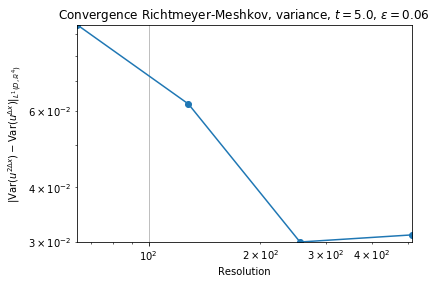

Saving mean_Richtmeyer-Meshkov_64_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


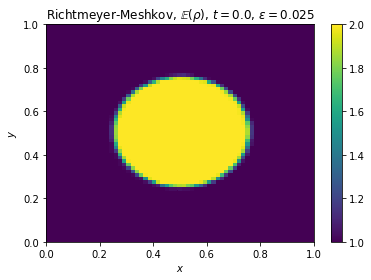

Saving mean_Richtmeyer-Meshkov_128_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


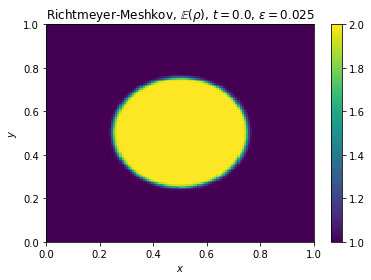

Saving mean_Richtmeyer-Meshkov_256_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


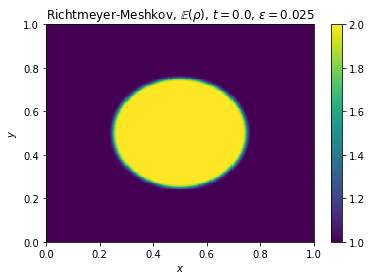

Saving mean_Richtmeyer-Meshkov_512_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


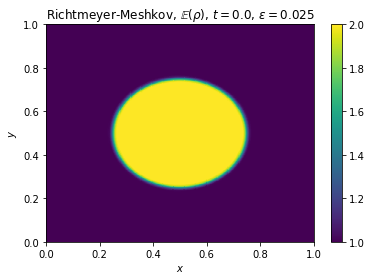

Saving mean_Richtmeyer-Meshkov_1024_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


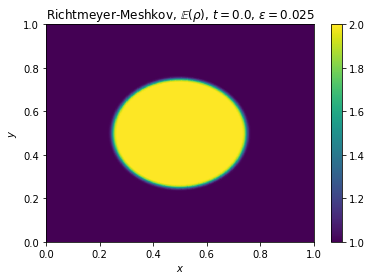

[ 0.10988855  0.05503732  0.03046701  0.01235186]
Saving convergence_mean_Richtmeyer-Meshkov_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


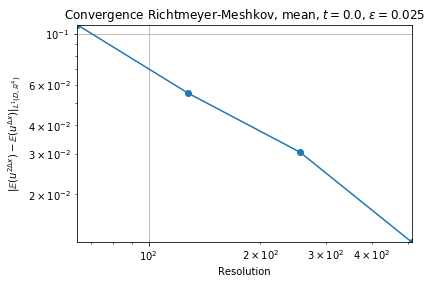

Saving variance_Richtmeyer-Meshkov_64_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


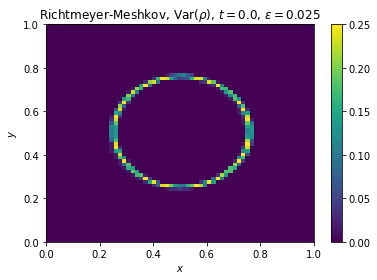

Saving variance_Richtmeyer-Meshkov_128_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


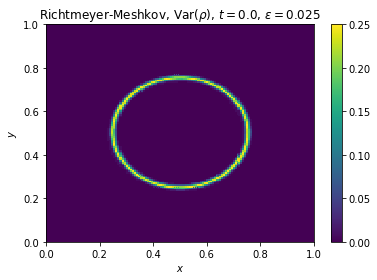

Saving variance_Richtmeyer-Meshkov_256_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


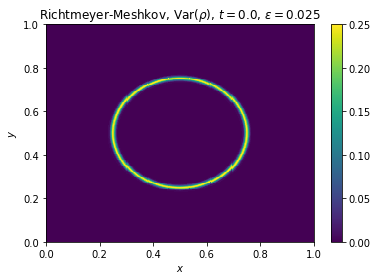

Saving variance_Richtmeyer-Meshkov_512_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


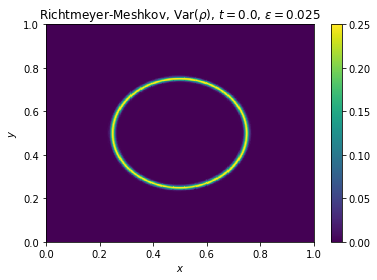

Saving variance_Richtmeyer-Meshkov_1024_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


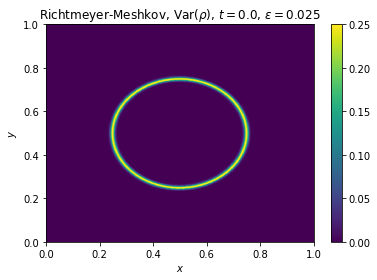

[ 0.00285063  0.00143681  0.00074106  0.00039311]
Saving convergence_variance_Richtmeyer-Meshkov_00250_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


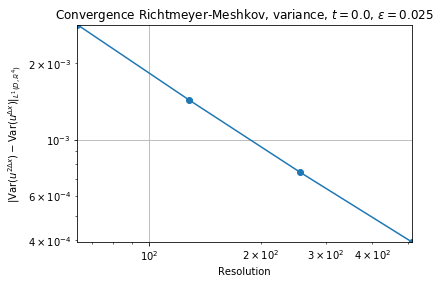

Saving mean_Richtmeyer-Meshkov_64_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


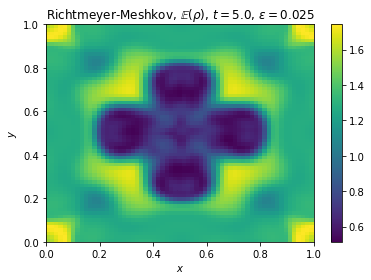

Saving mean_Richtmeyer-Meshkov_128_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


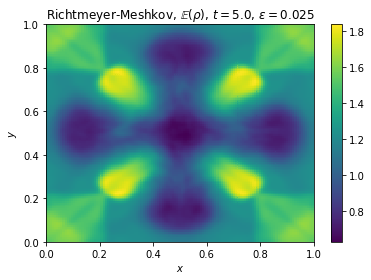

Saving mean_Richtmeyer-Meshkov_256_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


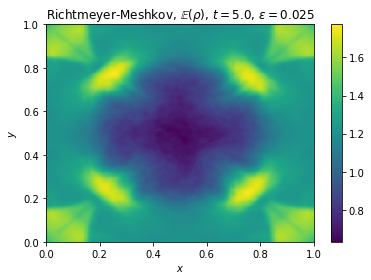

Saving mean_Richtmeyer-Meshkov_512_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


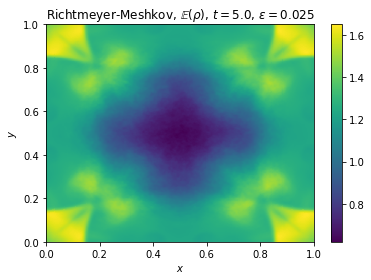

Saving mean_Richtmeyer-Meshkov_1024_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


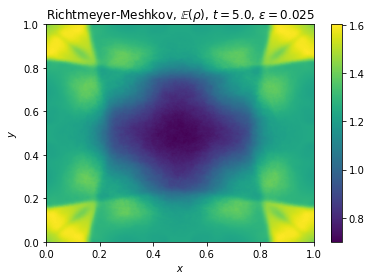

[ 0.76865951  0.47239835  0.14220564  0.14619185]
Saving convergence_mean_Richtmeyer-Meshkov_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


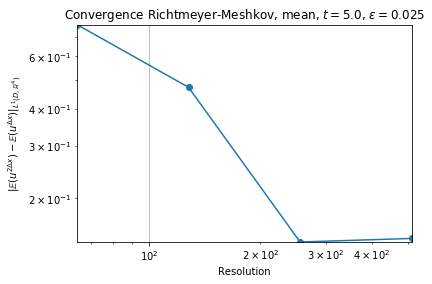

Saving variance_Richtmeyer-Meshkov_64_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


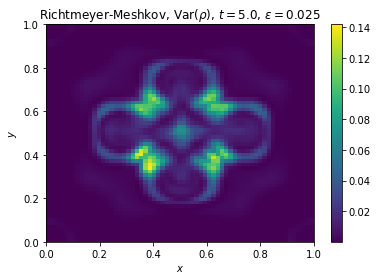

Saving variance_Richtmeyer-Meshkov_128_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


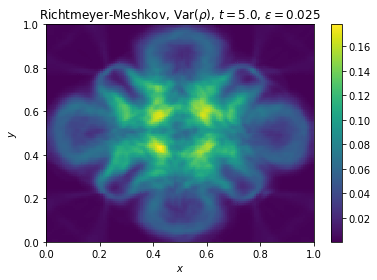

Saving variance_Richtmeyer-Meshkov_256_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


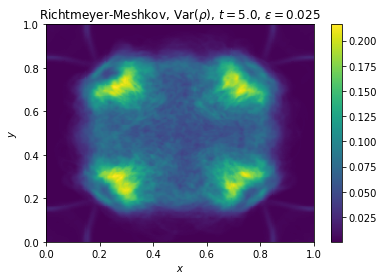

Saving variance_Richtmeyer-Meshkov_512_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


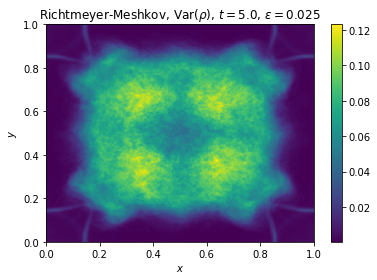

Saving variance_Richtmeyer-Meshkov_1024_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


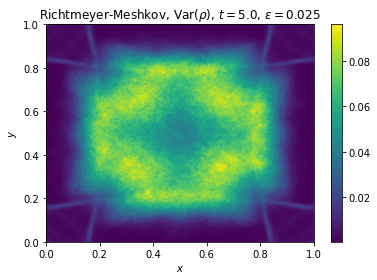

[ 0.06369076  0.05617368  0.02625984  0.03097048]
Saving convergence_variance_Richtmeyer-Meshkov_00250_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


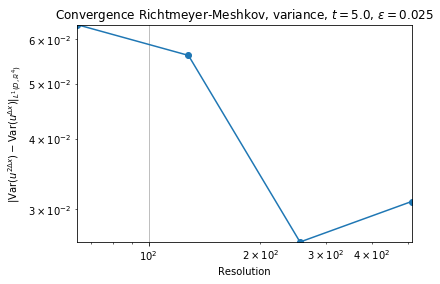

Saving mean_Richtmeyer-Meshkov_64_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


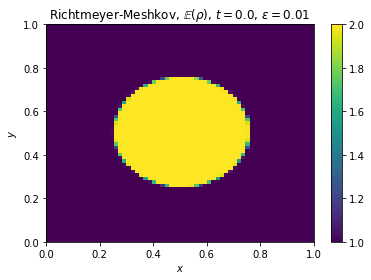

Saving mean_Richtmeyer-Meshkov_128_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


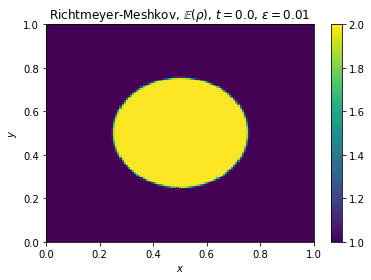

Saving mean_Richtmeyer-Meshkov_256_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


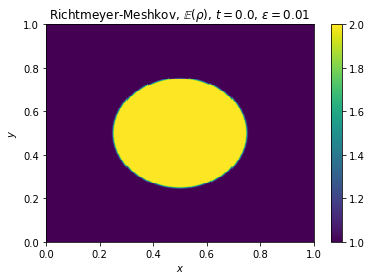

Saving mean_Richtmeyer-Meshkov_512_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


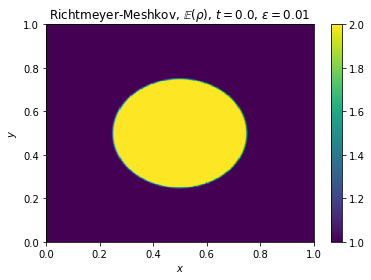

Saving mean_Richtmeyer-Meshkov_1024_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


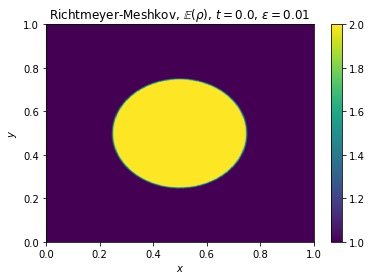

[ 0.10941601  0.05492932  0.03038658  0.01229735]
Saving convergence_mean_Richtmeyer-Meshkov_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


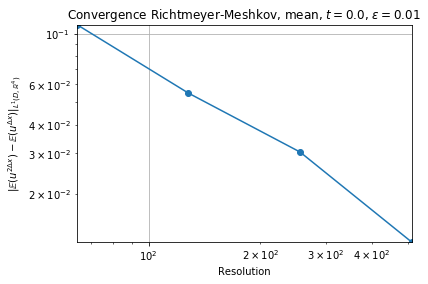

Saving variance_Richtmeyer-Meshkov_64_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


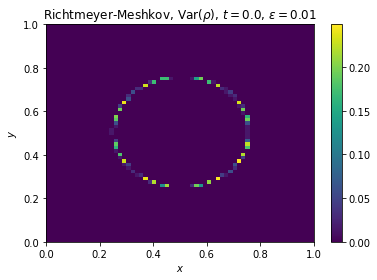

Saving variance_Richtmeyer-Meshkov_128_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


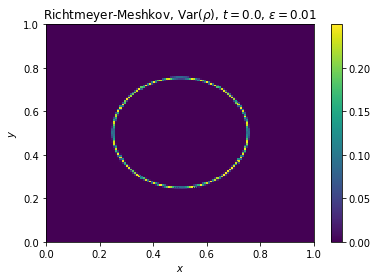

Saving variance_Richtmeyer-Meshkov_256_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


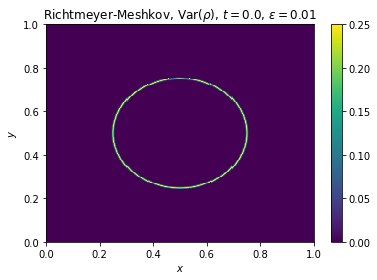

Saving variance_Richtmeyer-Meshkov_512_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


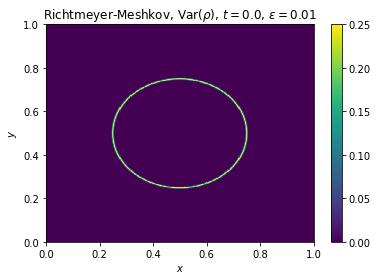

Saving variance_Richtmeyer-Meshkov_1024_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


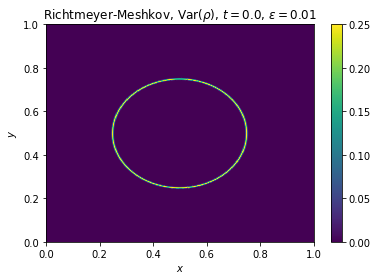

[ 0.00233359  0.00138458  0.00069587  0.00035299]
Saving convergence_variance_Richtmeyer-Meshkov_00100_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


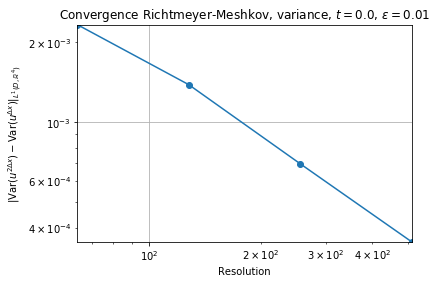

Saving mean_Richtmeyer-Meshkov_64_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


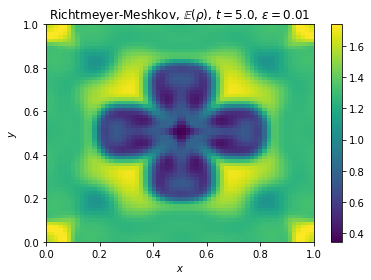

Saving mean_Richtmeyer-Meshkov_128_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


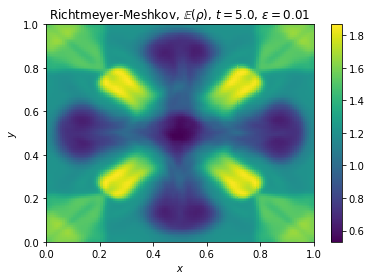

Saving mean_Richtmeyer-Meshkov_256_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


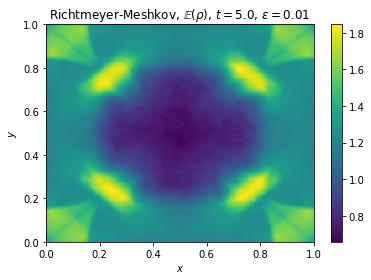

Saving mean_Richtmeyer-Meshkov_512_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


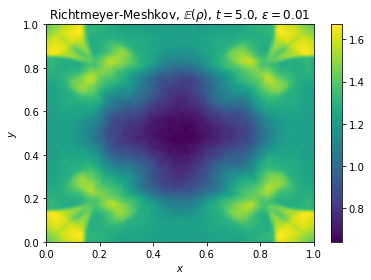

Saving mean_Richtmeyer-Meshkov_1024_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


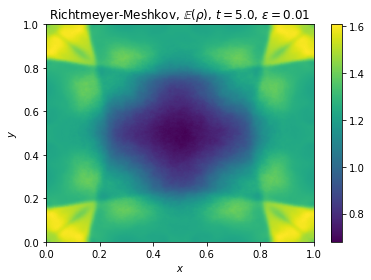

[ 0.81882651  0.53962904  0.18239556  0.16178222]
Saving convergence_mean_Richtmeyer-Meshkov_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


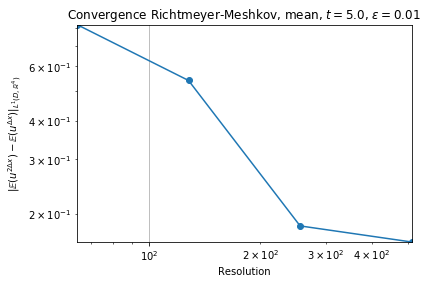

Saving variance_Richtmeyer-Meshkov_64_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


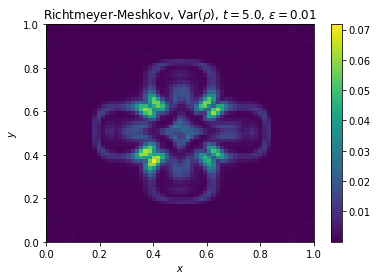

Saving variance_Richtmeyer-Meshkov_128_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


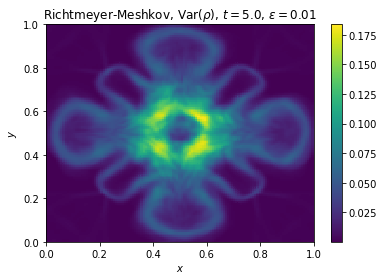

Saving variance_Richtmeyer-Meshkov_256_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


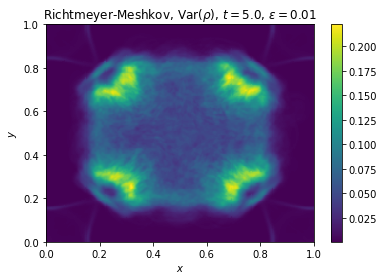

Saving variance_Richtmeyer-Meshkov_512_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


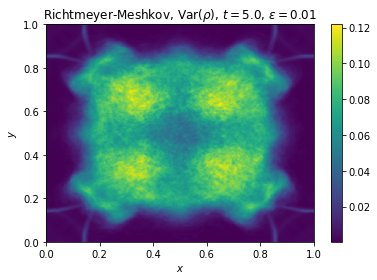

Saving variance_Richtmeyer-Meshkov_1024_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


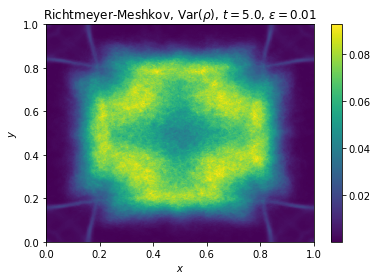

[ 0.04361571  0.05251141  0.03231864  0.03111663]
Saving convergence_variance_Richtmeyer-Meshkov_00100_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


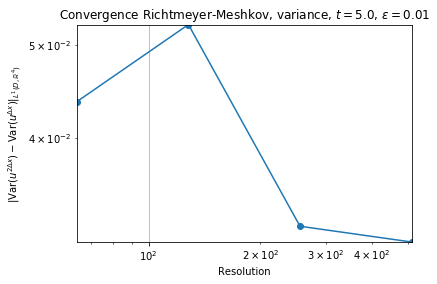

Saving mean_Richtmeyer-Meshkov_64_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


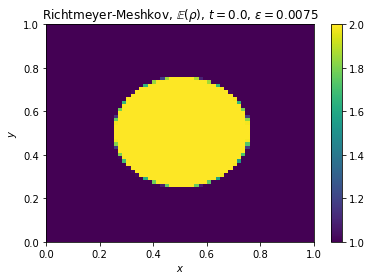

Saving mean_Richtmeyer-Meshkov_128_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


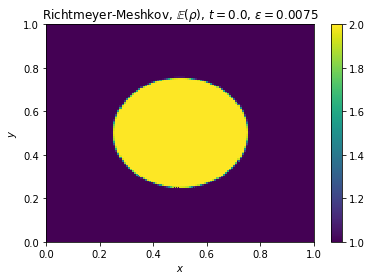

Saving mean_Richtmeyer-Meshkov_256_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


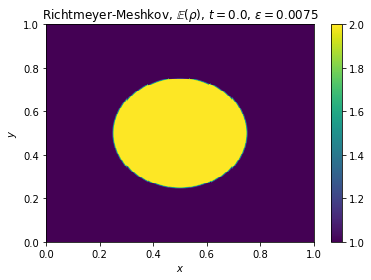

Saving mean_Richtmeyer-Meshkov_512_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


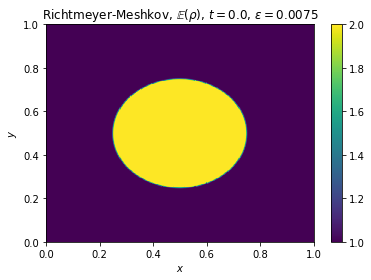

Saving mean_Richtmeyer-Meshkov_1024_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


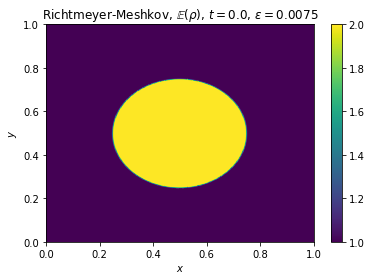

[ 0.10926437  0.05486912  0.03038138  0.01229246]
Saving convergence_mean_Richtmeyer-Meshkov_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


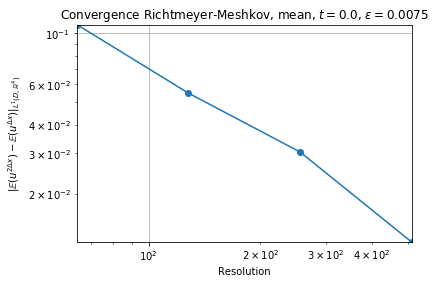

Saving variance_Richtmeyer-Meshkov_64_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


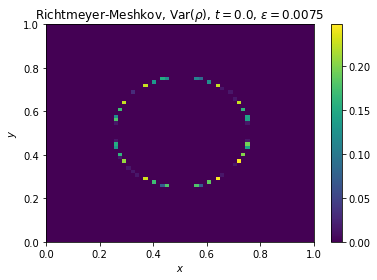

Saving variance_Richtmeyer-Meshkov_128_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


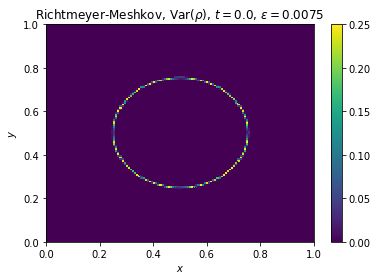

Saving variance_Richtmeyer-Meshkov_256_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


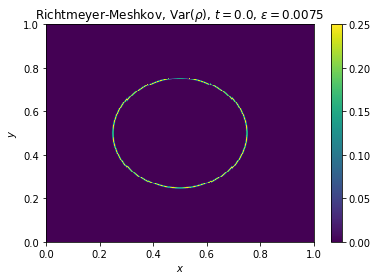

Saving variance_Richtmeyer-Meshkov_512_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


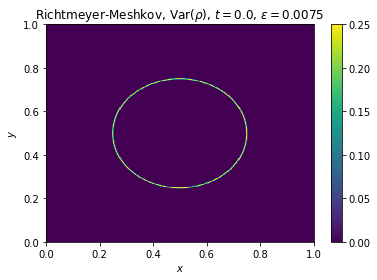

Saving variance_Richtmeyer-Meshkov_1024_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


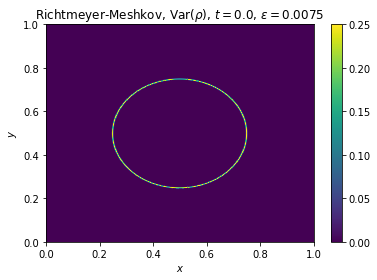

[ 0.0019917   0.00132421  0.0006935   0.00034894]
Saving convergence_variance_Richtmeyer-Meshkov_00075_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


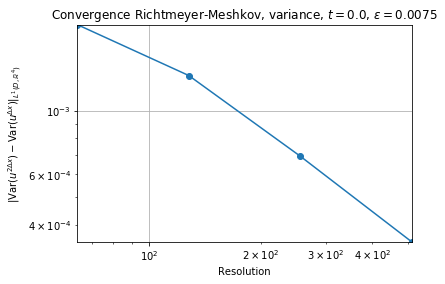

Saving mean_Richtmeyer-Meshkov_64_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


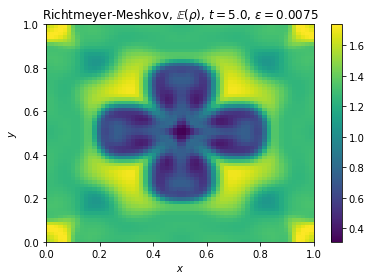

Saving mean_Richtmeyer-Meshkov_128_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


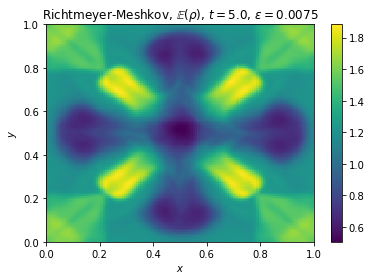

Saving mean_Richtmeyer-Meshkov_256_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


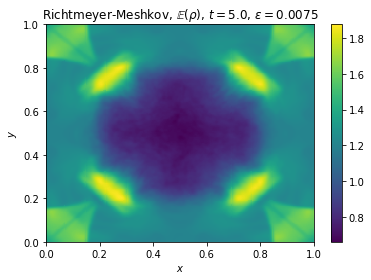

Saving mean_Richtmeyer-Meshkov_512_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


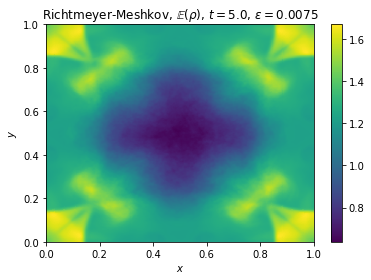

Saving mean_Richtmeyer-Meshkov_1024_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


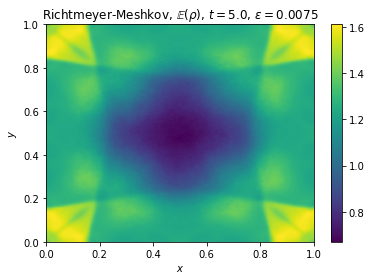

[ 0.82968714  0.55933839  0.19383964  0.16154493]
Saving convergence_mean_Richtmeyer-Meshkov_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


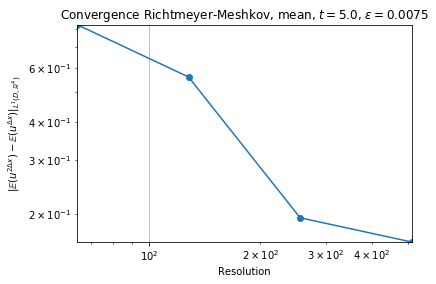

Saving variance_Richtmeyer-Meshkov_64_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


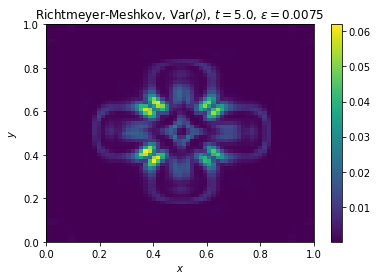

Saving variance_Richtmeyer-Meshkov_128_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


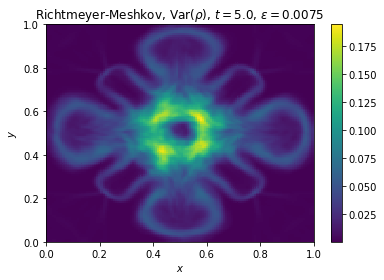

Saving variance_Richtmeyer-Meshkov_256_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


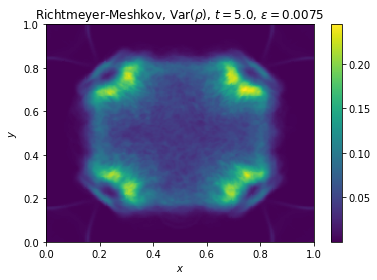

Saving variance_Richtmeyer-Meshkov_512_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


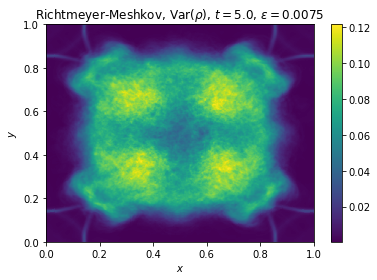

Saving variance_Richtmeyer-Meshkov_1024_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


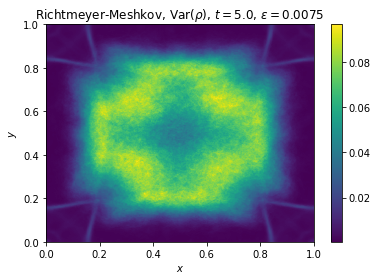

[ 0.03991342  0.05194424  0.03533798  0.03081829]
Saving convergence_variance_Richtmeyer-Meshkov_00075_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


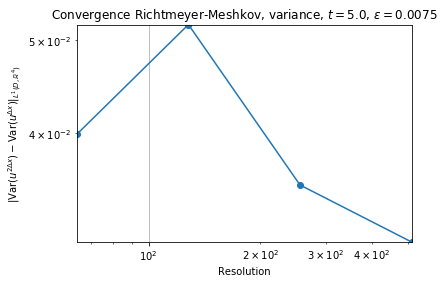

Saving mean_Richtmeyer-Meshkov_64_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


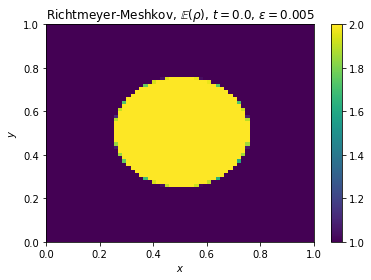

Saving mean_Richtmeyer-Meshkov_128_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


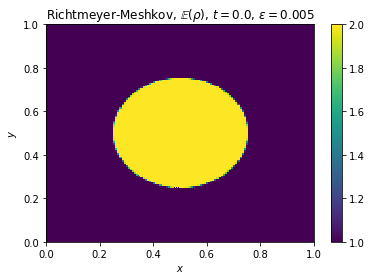

Saving mean_Richtmeyer-Meshkov_256_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


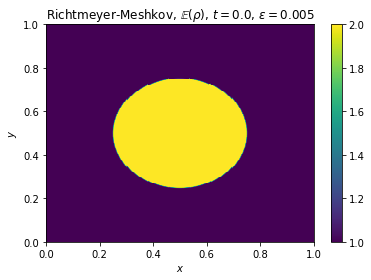

Saving mean_Richtmeyer-Meshkov_512_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


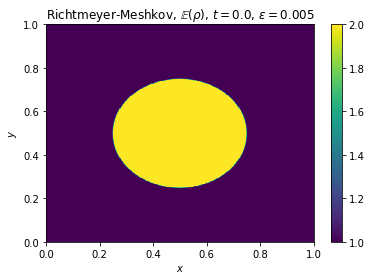

Saving mean_Richtmeyer-Meshkov_1024_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


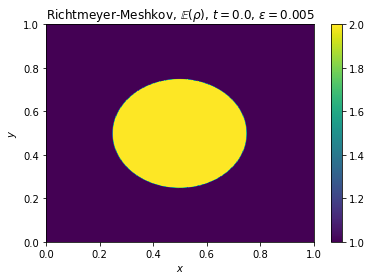

[ 0.10919714  0.05477983  0.03036477  0.01228883]
Saving convergence_mean_Richtmeyer-Meshkov_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


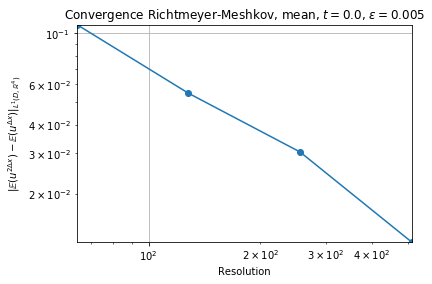

Saving variance_Richtmeyer-Meshkov_64_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


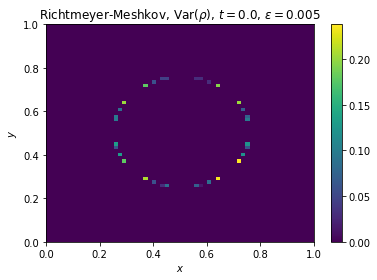

Saving variance_Richtmeyer-Meshkov_128_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


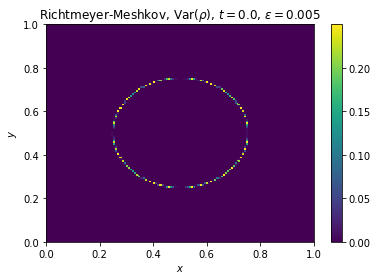

Saving variance_Richtmeyer-Meshkov_256_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


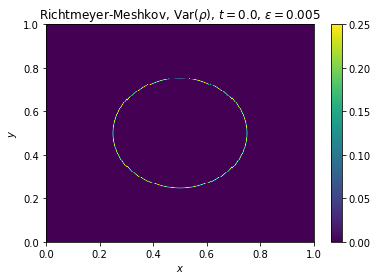

Saving variance_Richtmeyer-Meshkov_512_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


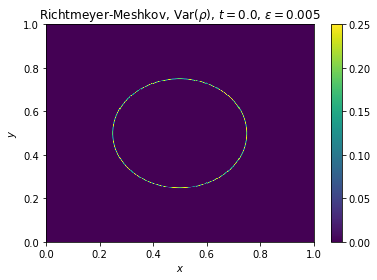

Saving variance_Richtmeyer-Meshkov_1024_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


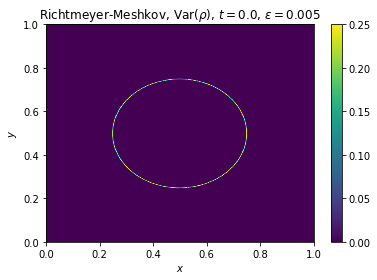

[ 0.00150027  0.00119527  0.00068158  0.00034561]
Saving convergence_variance_Richtmeyer-Meshkov_00050_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


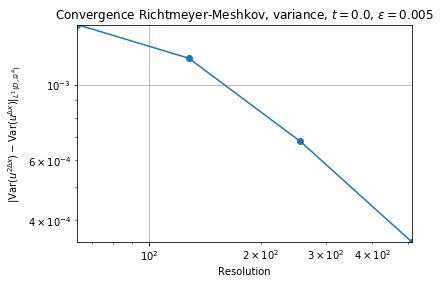

Saving mean_Richtmeyer-Meshkov_64_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


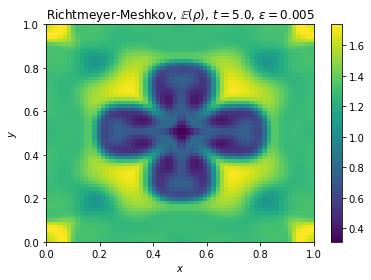

Saving mean_Richtmeyer-Meshkov_128_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


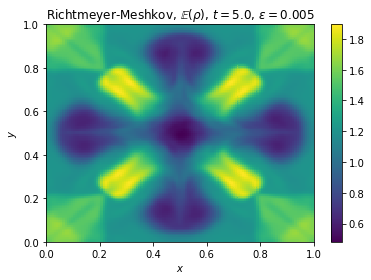

Saving mean_Richtmeyer-Meshkov_256_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


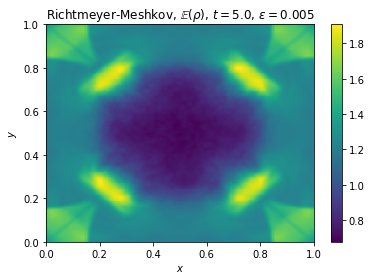

Saving mean_Richtmeyer-Meshkov_512_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


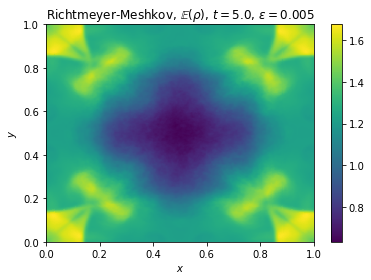

Saving mean_Richtmeyer-Meshkov_1024_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


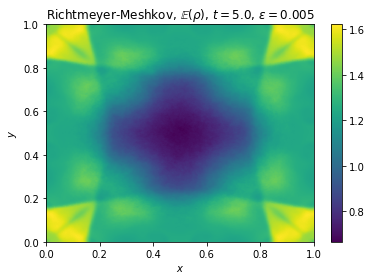

[ 0.83801996  0.5722457   0.2060504   0.16191642]
Saving convergence_mean_Richtmeyer-Meshkov_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


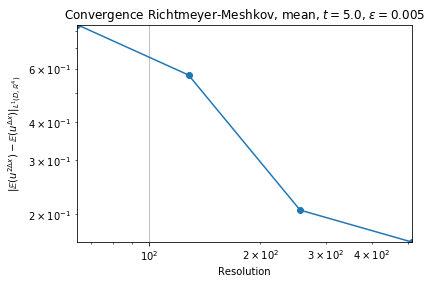

Saving variance_Richtmeyer-Meshkov_64_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


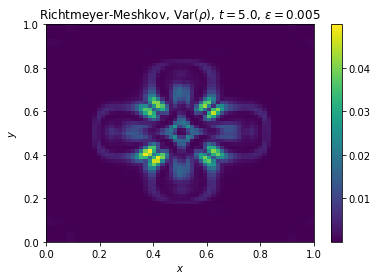

Saving variance_Richtmeyer-Meshkov_128_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


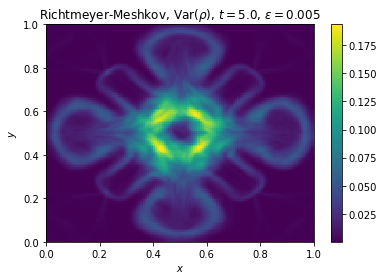

Saving variance_Richtmeyer-Meshkov_256_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


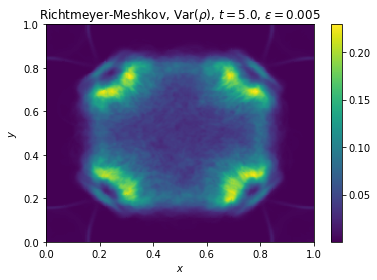

Saving variance_Richtmeyer-Meshkov_512_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


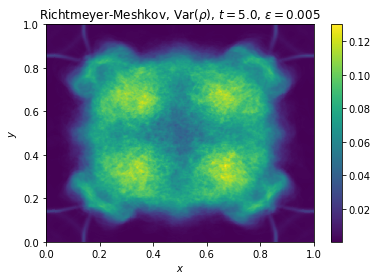

Saving variance_Richtmeyer-Meshkov_1024_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


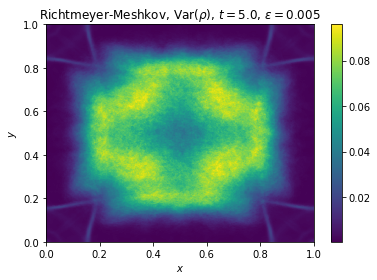

[ 0.03568132  0.0528921   0.03762386  0.03015493]
Saving convergence_variance_Richtmeyer-Meshkov_00050_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


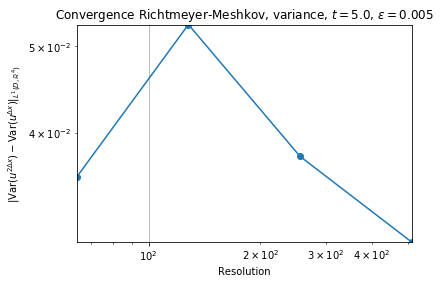

In [21]:
def plot_mean_var_convergence(configuration):
    perturbations = configuration['perturbations']
    Tarray = configuration['Tarray']
    resolutions = configuration['resolutions']
    stat_filename = configuration['stat_filename']
    name = configuration['name']
    for perturbation in perturbations:
        for time in Tarray:
            for stat in ['mean', 'variance']:
                errors = zeros(len(resolutions)-1)
                for var in ['rho','E','mx','my']:
                    for (nr, r) in enumerate(resolutions):
                        filename = stat_filename.format(stat=stat,t=time, perturbation=perturbation, resolution=r)
                        
                        basepath = plot_info.get_environment("STATISTICAL_STRUCTURE", [filename])
                        #print stat_filename.format(stat=stat,t=time, perturbation=perturbation, resolution=r)
                        with netCDF4.Dataset(os.path.join(basepath, filename)) as f:
                            d = f.variables[var][:,:,0].T
                            N = d.shape[0]


                            if r > resolutions[0]:
                                errors[nr-1] += (sum(abs(d-dPrev))/r**2)
                            dPrev = repeat(d,2,0)
                            dPrev = repeat(dPrev,2,1)
                            if var == 'rho':
                                if stat == 'variance':
                                    statName = '\\mathrm{Var}'
                                elif stat == 'mean':
                                    statName = '\\mathbb{E}'
                                x,y = mgrid[0:1:N*1j,0:1:N*1j]
                                plt.pcolormesh(x,y,d)
                                plt.colorbar()
                                if len(perturbations) > 1:
                                    plt.title('{name}, ${stat} (\\rho)$, $t={time}$, $\\varepsilon={perturbation}$'.format(name=name, time=maxT*time/(float(max(Tarray))), stat=statName, perturbation=perturbation))
                                else:
                                    plt.title('{name}, ${stat}(\\rho)$, $t={time}$'.format(name=name,time=maxT*time/(float(max(Tarray))), stat=statName, perturbation=perturbation))


                                plt.xlabel('$x$')
                                plt.ylabel('$y$')
                                showAndSave('%s_%s_%d_%.4f_%d' %(stat,name.replace('$','').replace(' ','_').replace('=',''), r,perturbation,time))
                print (errors )
                plt.xlim(resolutions[0], resolutions[-2])  
                plt.ylim(min(errors),max(errors))
                plt.loglog(resolutions[:-1], errors, '-o', basex=2, basey=2)
                plt.xlabel('Resolution')
                if stat == 'mean':
                    plt.ylabel('$\|\\mathbb{E}(u^{2\Delta x})-\\mathbb{E}(u^{\Delta x})\|_{L^1(D,\\mathbb{R}^4)}$')
                elif stat == 'variance':
                    plt.ylabel('$\|\\mathrm{Var}(u^{2\Delta x})-\\mathrm{Var}(u^{\Delta x})\|_{L^1(D,\\mathbb{R}^4)}$')

                if len(perturbations)>1:
                    plt.title('Convergence {name}, {stat}, $t={time}$, $\\varepsilon={perturbation}$'.format(name=name,time=maxT*time/(float(max(Tarray))), stat=stat, perturbation=perturbation))
                else:
                    plt.title('Convergence {name}, {stat}, $t={time}$'.format(name=name, time=maxT*time/(float(max(Tarray))), stat=stat, perturbation=perturbation))
                plt.xticks(resolutions[1:], ['${r} \\times {r}$'.format(r=r) for r in resolutions[1:]])

                plt.grid(True)
                showAndSave('convergence_%s_%s_%.4f_%d' %(stat,name.replace('$','').replace(' ','_').replace('=','') ,perturbation,time))
                
for_each_config(plot_mean_var_convergence)

Saving scaling_Kelvin-Helmholtz_1_01_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


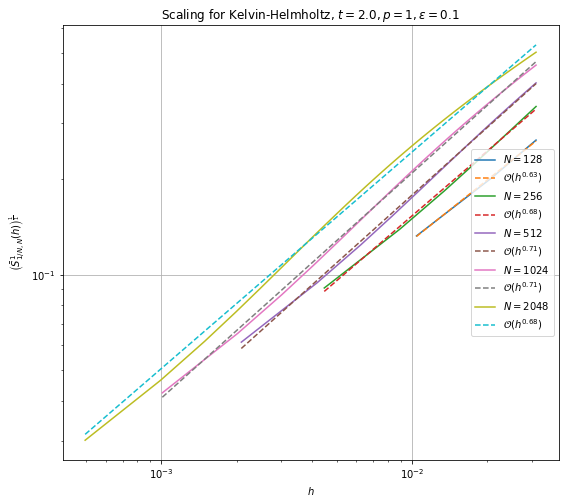

Saving convergence_Kelvin-Helmholtz_1_01_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


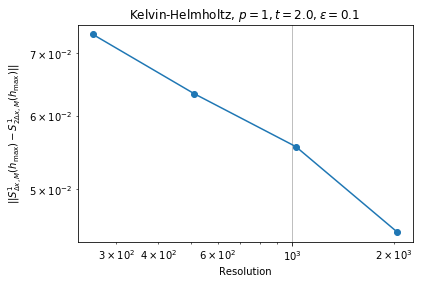

Saving scaling_Kelvin-Helmholtz_1_01_2
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


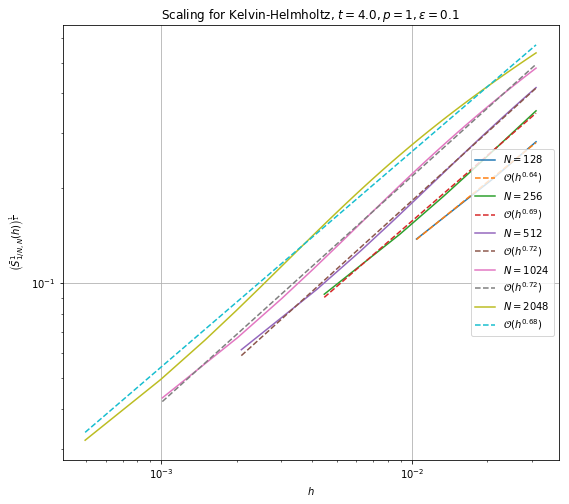

Saving convergence_Kelvin-Helmholtz_1_01_2
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


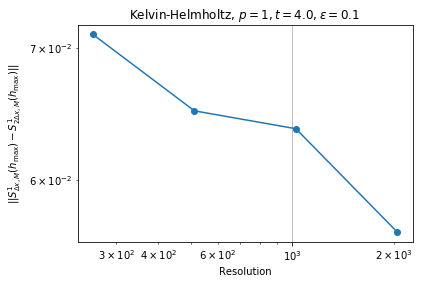

KeyboardInterrupt: 

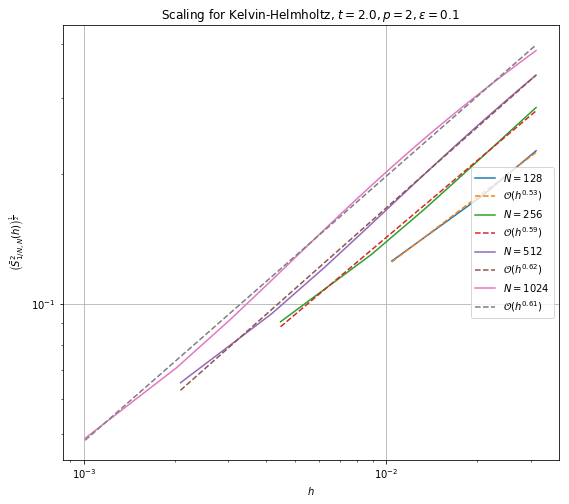

In [29]:
def convergence_structure_functions(config):
    headline("Component convergence Box averaged structure functions")
    variables = ['rho', 'mx','my','E']
    perturbations = config['perturbations']
    Tarray = config['Tarray']
    resolutions = config['resolutions']
    cube_filename = config['cube_filename']
    name = config['name']
    for perturbation in perturbations:
        h2("perturbation = %.2f" % perturbation)
        for p in [1,2,3]:
            h3("p = %d" % p)
            for t in Tarray[1:]:
                h4("t = %d" % (0.2*t))

                errors = zeros(len(resolutions)-1)


                for (nr, resolution) in enumerate(resolutions):
                    dVar = zeros((64*resolution)/2048)
                    for variable in variables:

                        filename = cube_filename.format(perturbation = perturbation, p=p,t=t,resolution=resolution)

                        d = getlineintegral(filename, variable, resolution)


                        dVar += d
                    dVar = dVar**(1.0/p)
                    if resolution > resolutions[0]:
                        errors[nr-1] = abs(dVar[-1]-dPrev[-1])
                    dPrev = repeat(dVar,2,0)
                    if len(perturbations) > 1:
                        title = 'Scaling for {name}, $t={time},p={p},\\varepsilon={perturbation}$'.format(name=name,time=t*maxT/float(len(Tarray)-1),p=p,perturbation=perturbation)
                    else:
                        title = 'Scaling for {name}, $t={time},p={p}$'.format(name=name,time=t*maxT/float(max(Tarray)),p=p,perturbation=perturbation)

                    plotscalings(dVar, resolution, title, False)
                    plt.xlabel('$h$')
                    plt.ylabel('$\\left(\\bar{S}^{%d}_{1/N,N}(h)\\right)^{\\frac{1}{%d}}$' % (p,p))
                for nr in range(len(resolutions)-1):
                    errors[nr] = abs(errors[nr])

                showAndSave('scaling_{name}_{p}_{perturbation}_{time}'.format(name=name.replace('$','').replace(' ',"_").replace('=',''), p=p, perturbation=perturbation, time=t))
                plt.loglog(resolutions[1:],errors,'-o',label='%s' % variable, basex=2, basey=2)
                if len(perturbations)>1:
                    title = '{name}, $p={p}, t={t}, \\varepsilon={perturbation}$'.format(name=name, perturbation=perturbation, p=p,t=t*maxT/float(max(Tarray)))
                else:
                    title = '{name}, $p={p}, t={t}$'.format(name=name, perturbation=perturbation, p=p,t=t*maxT/float(max(Tarray)))

                #plt.title('{name}, $p={p}, t={t}, \\varepsilon={perturbation}$'.format(name=name, perturbation=perturbation, p=p,t=t*maxT/float(max(Tarray))))

                plt.title(title)
                plt.xlabel('Resolution')
                plt.ylabel('$||S^{%d}_{\Delta x,M}(h_{\\max})-S^{%d}_{2\Delta x,M}(h_{\\max})||$' % (p,p) )
                plt.grid('on')
                plt.xticks(resolutions[1:], ['${r} \\times {r}$'.format(r=r) for r in resolutions[1:]])
                showAndSave('convergence_{name}_{p}_{perturbation}_{time}'.format(name=name.replace('$','').replace(' ',"_").replace('=',''), p=p, perturbation=perturbation, time=t))
                
for_each_config(convergence_structure_functions)

Saving scaling_perturbation_Kelvin-Helmholtz_with_Gaussian_perturbation_1_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


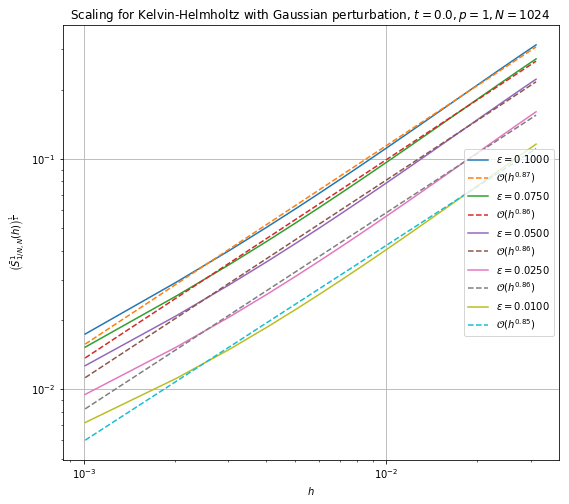

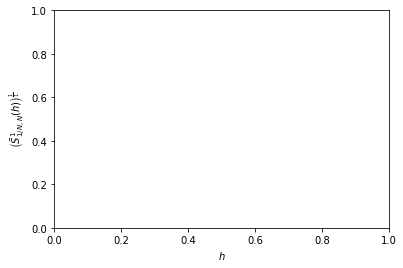

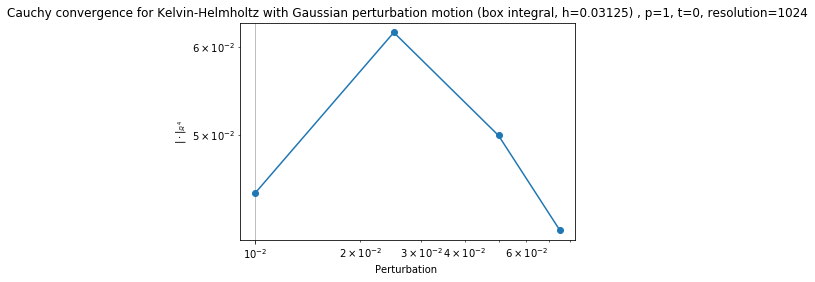

Saving scaling_perturbation_Kelvin-Helmholtz_with_Gaussian_perturbation_1_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


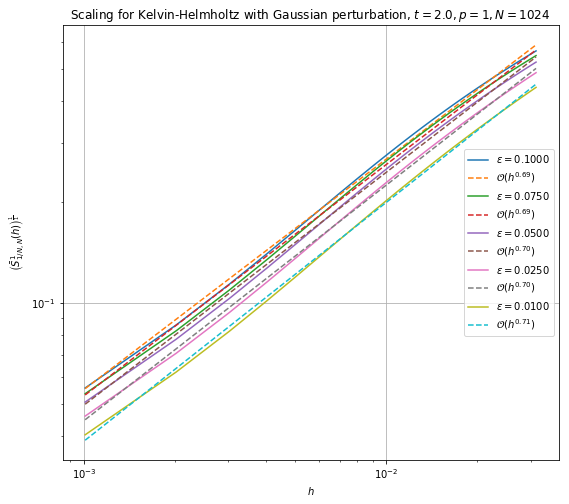

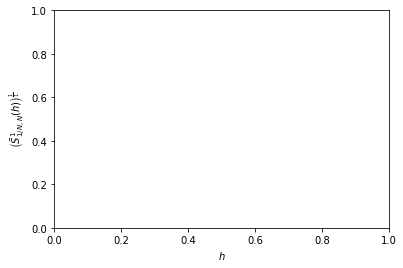

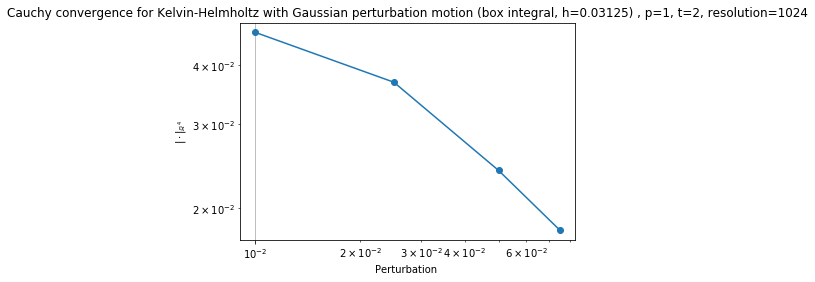

Saving scaling_perturbation_Kelvin-Helmholtz_with_Gaussian_perturbation_2_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


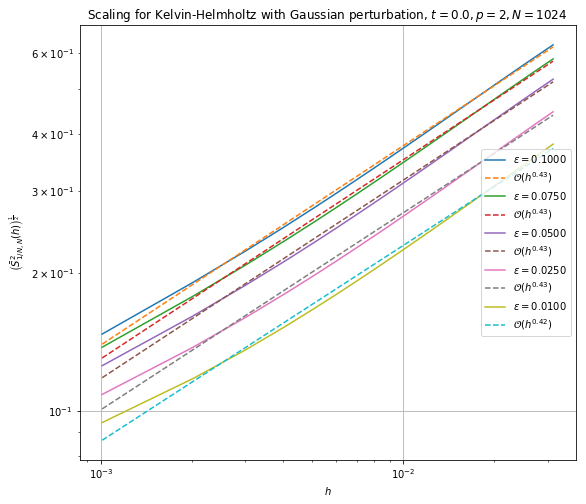

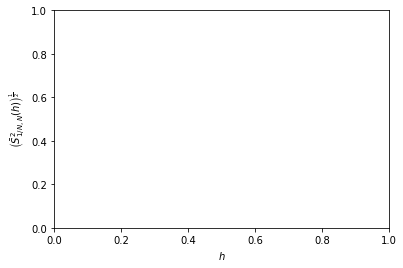

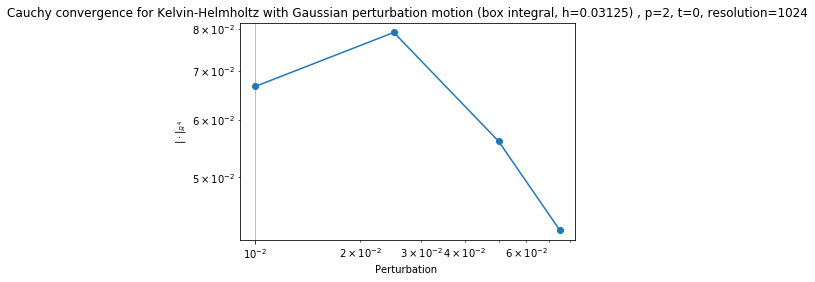

Saving scaling_perturbation_Kelvin-Helmholtz_with_Gaussian_perturbation_2_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


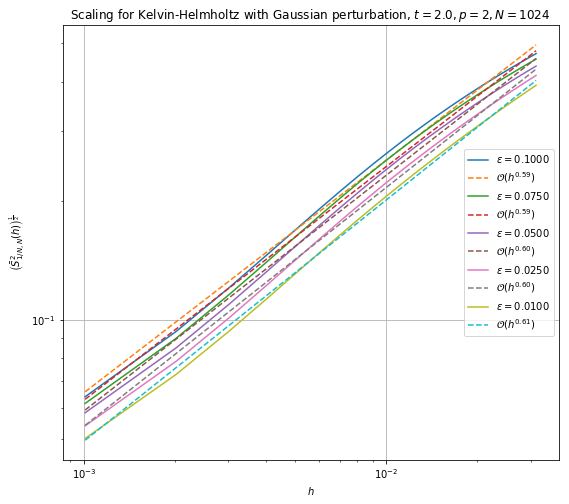

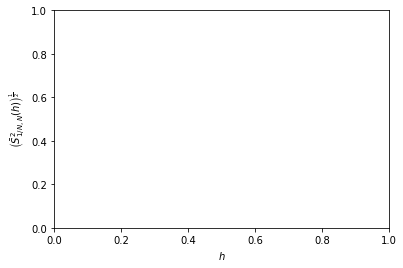

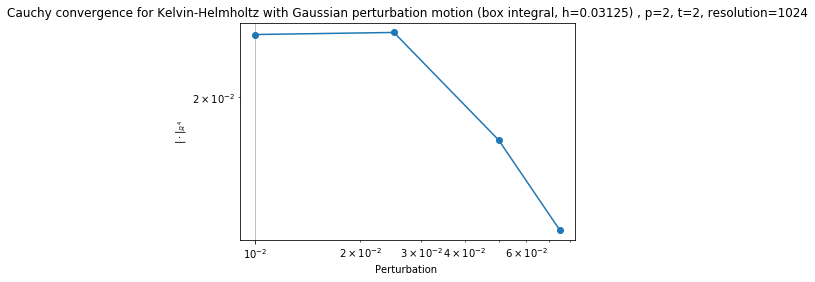

Saving scaling_perturbation_Kelvin-Helmholtz_with_Gaussian_perturbation_3_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


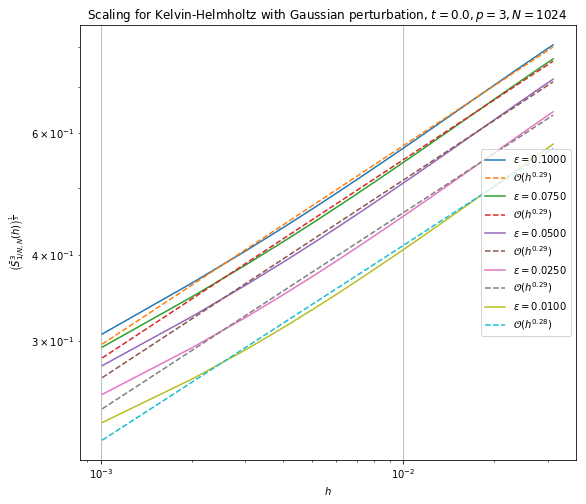

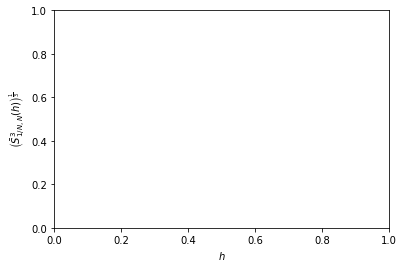

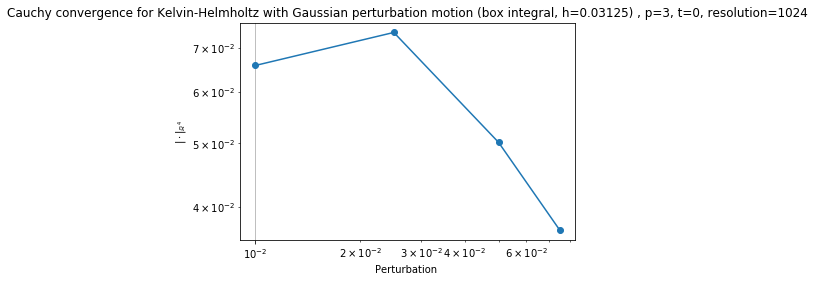

Saving scaling_perturbation_Kelvin-Helmholtz_with_Gaussian_perturbation_3_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


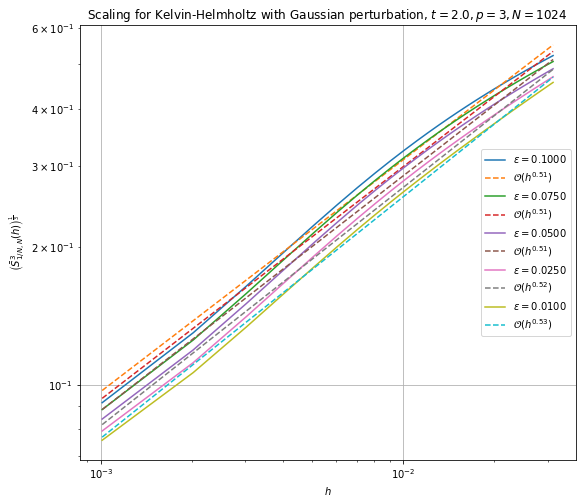

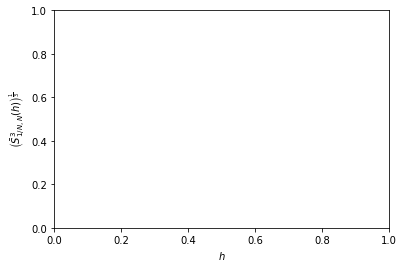

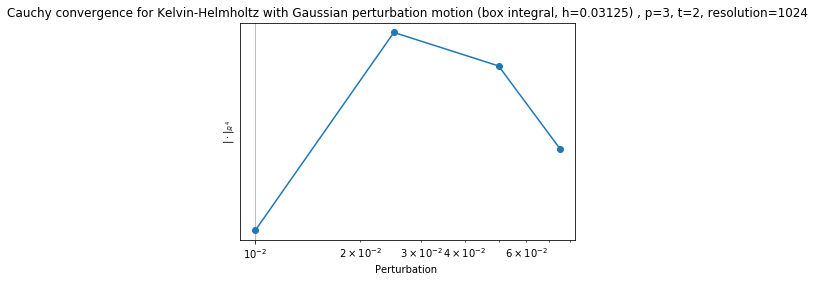

In [49]:
def convergence_structure_functions_perturbation(config):
    resolutions = config['resolutions']
    name = config['name']
    cube_filename = config['cube_filename']
    Tarray = config['Tarray']
    
    headline("Component convergence Box averaged structure functions(perturbation convergence)")
    resolution = resolutions[len(resolutions)-1]
    variables = ['rho', 'mx','my','E']

    for p in [1,2,3]:
        h3("p = %d" % p)
        for t in Tarray:
            h4("t = %d" % (0.2*t))

            errors = zeros(len(perturbations)-1)

            dVarRef = zeros((64*resolution)/2048)
            for variable in variables:

                filename = cube_filename.format(perturbation = perturbations[-1], p=p,t=t,resolution=resolution)

                d = getlineintegral(filename, variable, resolution)


                dVarRef += d
            dVarRef = dVarRef**(1.0/p)
            for (nr,perturbation) in enumerate(array(perturbations)[:-1]):
                dVar = zeros((64*resolution)/2048)
                for variable in variables:

                    filename = cube_filename.format(perturbation = perturbation, p=p,t=t,resolution=resolution)

                    d = getlineintegral(filename, variable, resolution)


                    dVar += d
                dVar = dVar**(1.0/p)
                
                errors[nr-1] = abs(dVar[-1]-dVarRef[-1])


                title = 'Scaling for {name}, $t={time},p={p}, N={N}$'.format(N=resolution, name=name,time=t*maxT/float(len(Tarray)-1),p=p)



                plt.xlabel('$h$')
                plt.ylabel('$\\left(\\bar{S}^{%d}_{1/N,N}(h)\\right)^{\\frac{1}{%d}}$' % (p,p))
                for nr in range(len(resolutions)-1):
                    errors[nr] = abs(errors[nr])



                plotscalings_perturbation(dVar, perturbation, title, False)
            for nr in range(len(resolutions)-1):
                errors[nr] = abs(errors[nr])
            showAndSave('scaling_perturbation_{name}_{p}_{resolution}_{time}'.format(resolution=resolution, name=name.replace('$','').replace(' ',"_").replace('=',''), p=p, time=t))   

            plt.loglog(perturbations[1:],errors,'-o',label='%s' % variable, basex=2, basey=2)
            plt.title('Convergence for {name} motion (box integral, h=0.03125) , p={p}, t={t}, resolution={resolution}'.format(name=name,resolution=resolution, p=p,t=2*t))
            plt.xlabel('Perturbation ($\\epsilon$)')
            plt.ylabel('$|\\cdot|_{\\mathbb{R}^{%d}}$' % len(variables))
            plt.grid('on')
            plt.xticks(resolutions[1:], ['${r} \\times {r}$'.format(r=r) for r in resolutions[1:]])
            showAndSave('convergence_scaling_perturbation_{name}_{p}_{resolution}_{time}'.format(resolution=resolution, name=name.replace('$','').replace(' ',"_").replace('=',''), p=p, time=t))   
for_each_config(convergence_structure_functions_perturbation)

# Comparison Gaussian with uniform

Saving scaling_compare_perturbation_Kelvin-Helmholtz_1_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


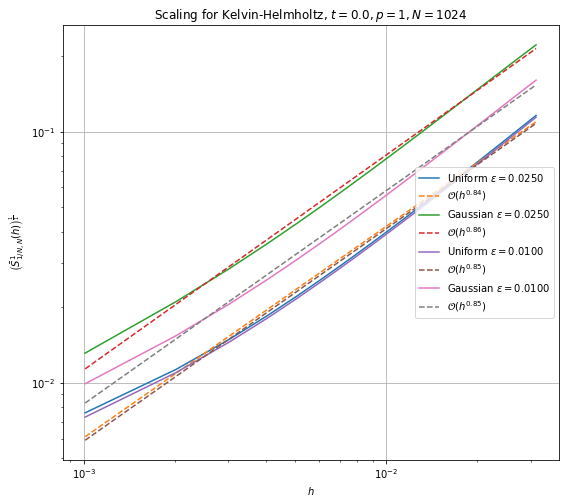

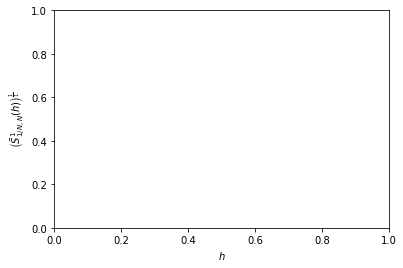

Saving scaling_compare_perturbation_Kelvin-Helmholtz_1_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


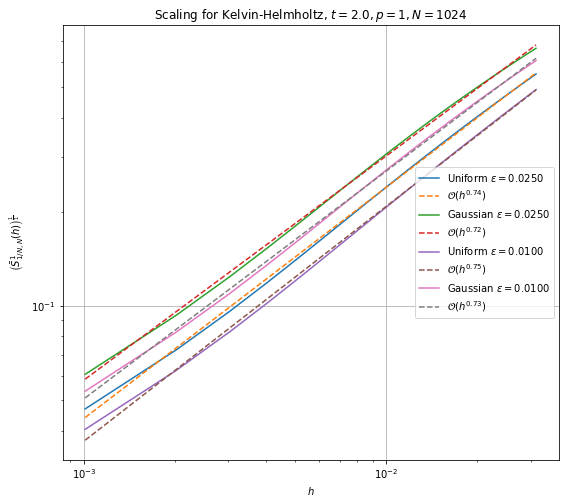

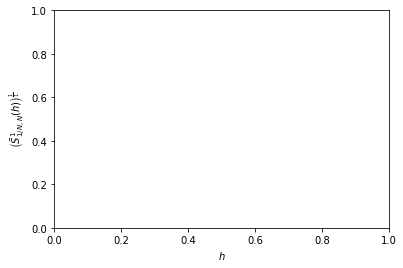

Saving scaling_compare_perturbation_Kelvin-Helmholtz_2_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


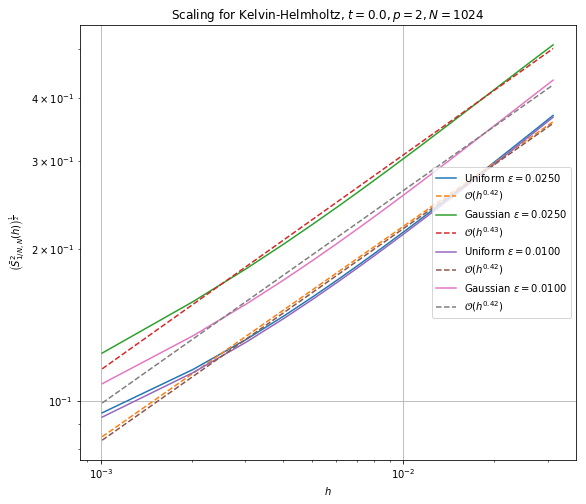

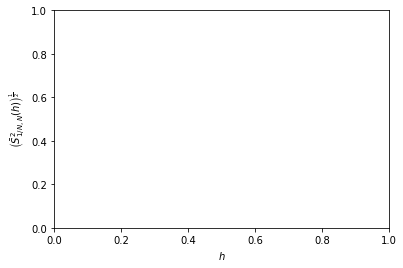

Saving scaling_compare_perturbation_Kelvin-Helmholtz_2_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


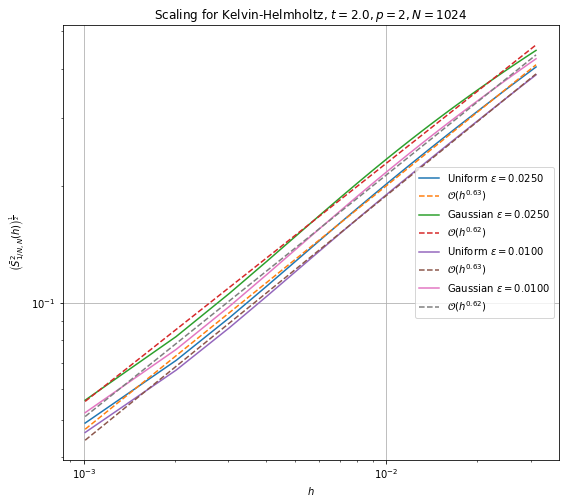

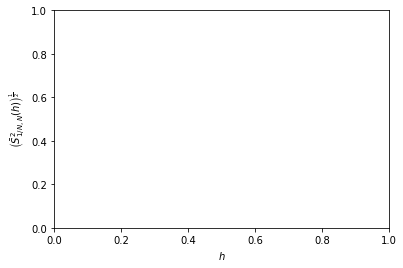

Saving scaling_compare_perturbation_Kelvin-Helmholtz_3_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


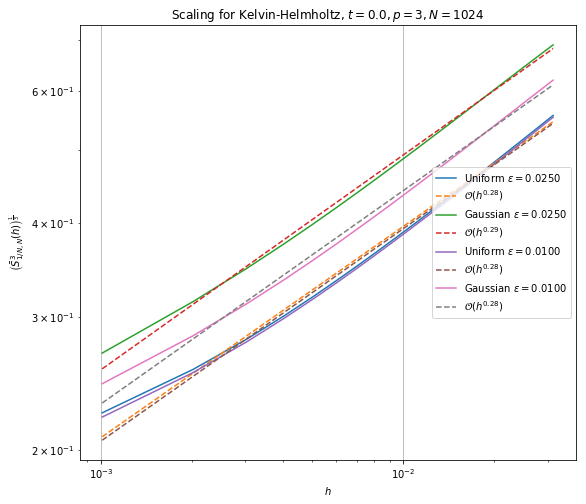

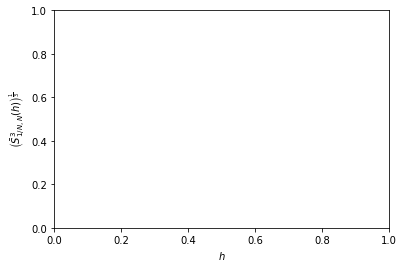

Saving scaling_compare_perturbation_Kelvin-Helmholtz_3_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


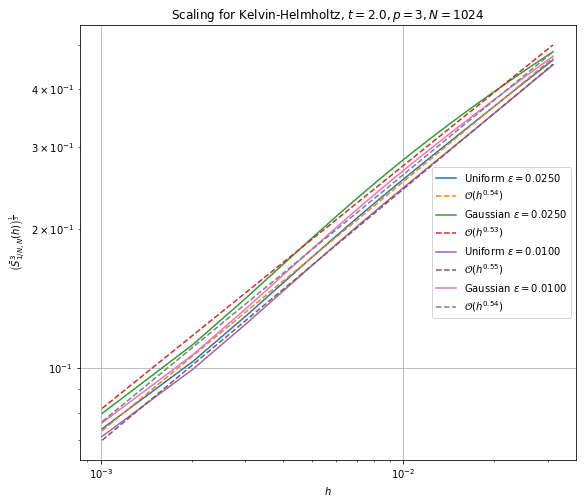

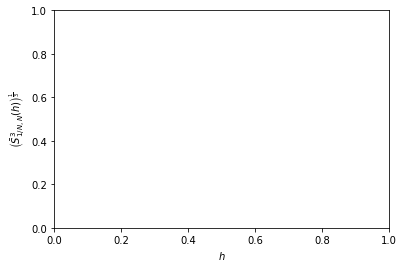

In [52]:
def compare_gaussian_uniform():
    headline("Comparison Gaussian with uniform")
    resolution = 1024
    variables = ['rho', 'mx','my','E']
    maxT=2.
    name='Kelvin-Helmholtz'
    names=['Uniform', 'Gaussian']
    Tarray=[0,1]
    resolutions = [64, 128,256,512,1024]

    perturbations = [ 0.025,0.01 ]
    variables = ['rho','mx','my','E','p','ux','uy']
    cube_filenames = ['kh_euler/kelvinhelmholtz_{perturbation}_{resolution}/kh_cube_structure_cube_{p}.000000_{t}.nc',
                      'kh_gaussian/kelvinhelmholtz_{perturbation}_{resolution}/kh_cube_structure_cube_{p}.000000_{t}.nc']

    for p in [1,2,3]:
        h3("p = %d" % p)
        for t in Tarray:
            h4("t = %d" % (0.2*t))



            for (nr,perturbation) in enumerate(array(perturbations)[:]):
                for n in range(len(cube_filenames)):
                    dVar = zeros((64*resolution)/2048)
                    for variable in variables:
                        cube_filename = cube_filenames[n]
                        filename = cube_filename.format(perturbation = perturbation, p=p,t=t,resolution=resolution)

                        d = getlineintegral(filename, variable, resolution)


                        dVar += d
                    dVar = dVar**(1.0/p)
                    if perturbation < perturbations[0]:
                        errors[nr-1] = abs(dVar[-1]-dPrev[-1])
                    dPrev = dVar


                    title = 'Scaling for {name}, $t={time},p={p}, N={N}$'.format(N=resolution, name=name,time=t*maxT/float(len(Tarray)-1),p=p)



                    plt.xlabel('$h$')
                    plt.ylabel('$\\left(\\bar{S}^{%d}_{1/N,N}(h)\\right)^{\\frac{1}{%d}}$' % (p,p))



                    plotscalings_perturbation(dVar, perturbation, title, False,name=names[n])
                
            showAndSave('scaling_compare_perturbation_{name}_{p}_{resolution}_{time}'.format(resolution=resolution, name=name.replace('$','').replace(' ',"_").replace('=',''), p=p, time=t))   
compare_gaussian_uniform()

# Comparison WENO, ENO, MC

Saving scaling_compare_schemes_Kelvin-Helmholtz_1_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


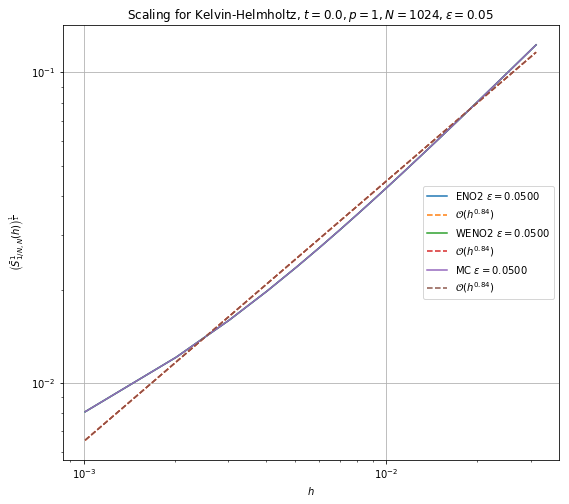

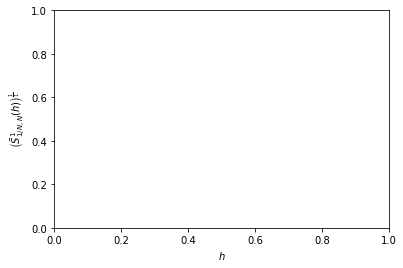

Saving scaling_compare_schemes_Kelvin-Helmholtz_1_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


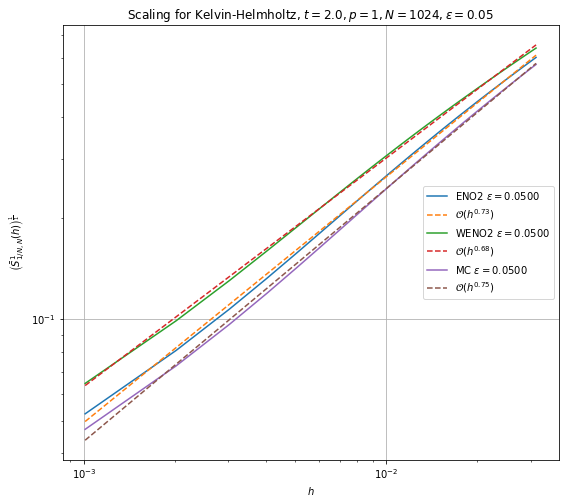

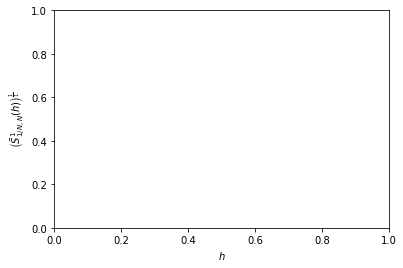

Saving scaling_compare_schemes_Kelvin-Helmholtz_2_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


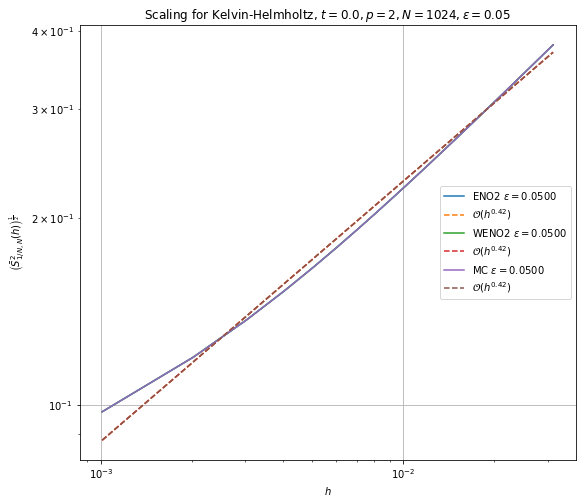

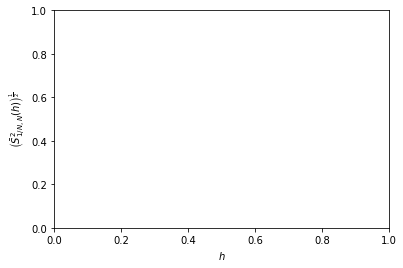

Saving scaling_compare_schemes_Kelvin-Helmholtz_2_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


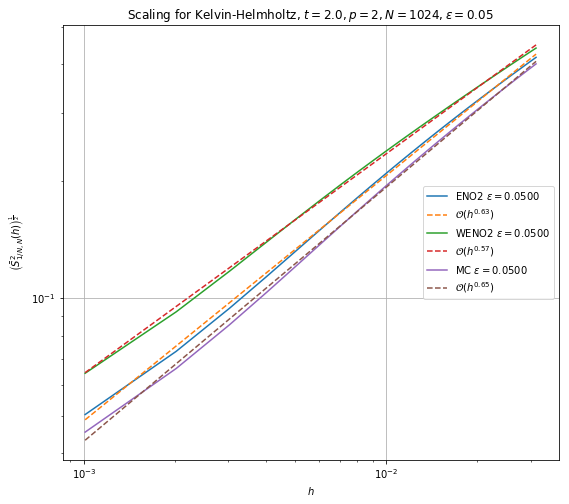

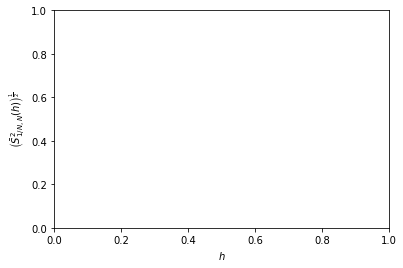

Saving scaling_compare_schemes_Kelvin-Helmholtz_3_1024_0
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


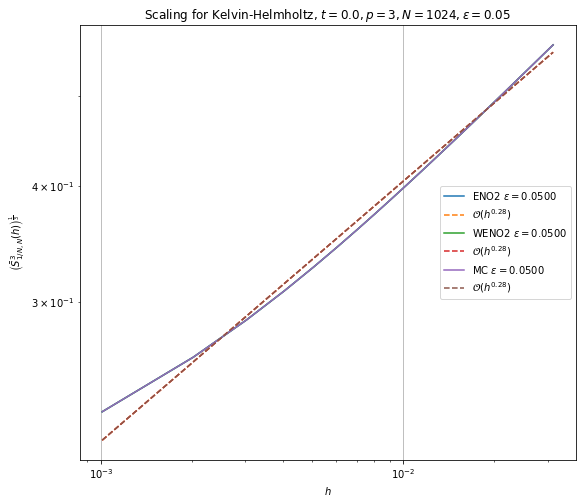

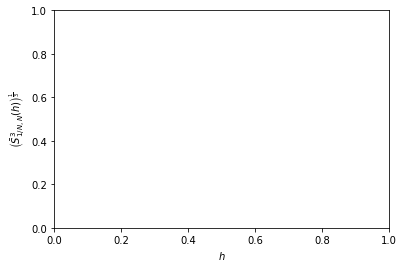

Saving scaling_compare_schemes_Kelvin-Helmholtz_3_1024_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


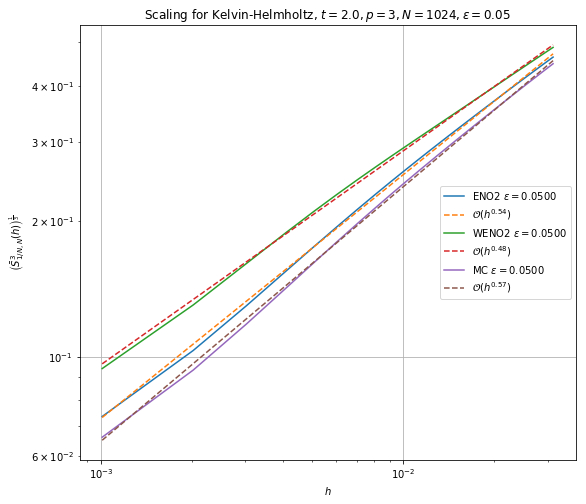

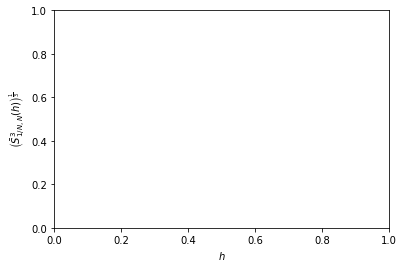

In [56]:
def compare_weno_eno_mc():
    headline("Comparison WENO, ENO, MC")
    resolutions = [64, 128,256,512,1024]
    resolution = resolutions[len(resolutions)-1]
    variables = ['rho', 'mx','my','E']
    maxT=2.
    name='Kelvin-Helmholtz'
    names=['ENO2', 'WENO2', 'MC']
    Tarray=[0,1]
    

    perturbation =0.05
    variables = ['rho','mx','my','E','p','ux','uy']
    cube_filenames = ['kh_euler/kelvinhelmholtz_0.05_{resolution}/kh_cube_structure_cube_{p}.000000_{t}.nc',
                      'kh_mc/n{resolution}/kh_cube_structure_cube_{p}.000000_{t}.nc',
                     'kh_eno/n{resolution}/kh_cube_structure_cube_{p}.000000_{t}.nc']

    for p in [1,2,3]:
        h3("p = %d" % p)
        for t in Tarray:
            h4("t = %d" % (0.2*t))




            for n in range(len(cube_filenames)):
                dVar = zeros((64*resolution)/2048)
                for variable in variables:
                    cube_filename = cube_filenames[n]
                    filename = cube_filename.format(perturbation = perturbation, p=p,t=t,resolution=resolution)

                    d = getlineintegral(filename, variable, resolution)


                    dVar += d
                dVar = dVar**(1.0/p)
                if perturbation < perturbations[0]:
                    errors[nr-1] = abs(dVar[-1]-dPrev[-1])
                dPrev = dVar


                title = 'Scaling for {name}, $t={time},p={p}, N={N}, \\epsilon={perturbation}$'.format(perturbation=perturbation, N=resolution, name=name,time=t*maxT/float(len(Tarray)-1),p=p)



                plt.xlabel('$h$')
                plt.ylabel('$\\left(\\bar{S}^{%d}_{1/N,N}(h)\\right)^{\\frac{1}{%d}}$' % (p,p))



                plotscalings_perturbation(dVar, perturbation, title, False,name=names[n])

            showAndSave('scaling_compare_schemes_{name}_{p}_{resolution}_{time}'.format(resolution=resolution, name=name.replace('$','').replace(' ',"_").replace('=',''), p=p, time=t))   


# Time Evolution

Saving exponent_evolution_1
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


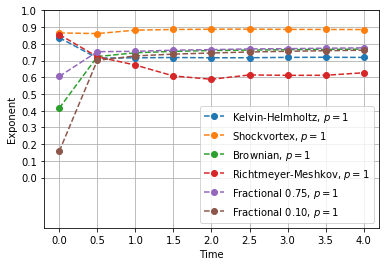

Saving exponent_evolution_2
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


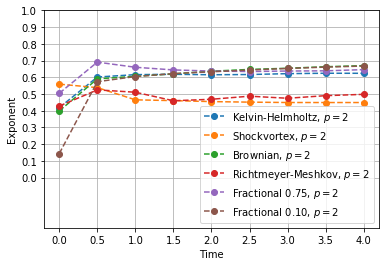

Saving exponent_evolution_3
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


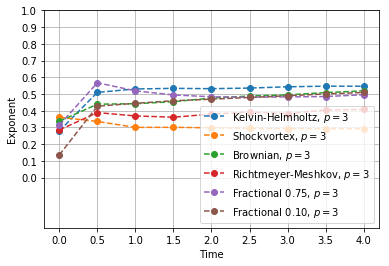

In [11]:
evolutionDatasets = {'Brownian' : {'filename' : 'evolution/brownian/brownianeuler_cube_structure_cube_{p}.000000_{t}.nc',
                                  'nSaves' : 16,
                                  'maxT' : 4},
                    'Kelvin-Helmholtz' : {'filename' : 'evolution/kh/kh_cube_structure_cube_{p}.000000_{t}.nc',
                                  'nSaves' : 8,
                                  'maxT' : 4},
                     'Richtmeyer-Meshkov' : {'filename' : 'evolution/rm/rm_cube_structure_cube_{p}.000000_{t}.nc',
                                  'nSaves' : 8,
                                  'maxT' : 4},
                     'Fractional 0.10' :  {'filename' : 'euler_brownian_010/euler_brownian_1024/brownianeuler_cube_structure_cube_{p}.000000_{t}.nc',
                                  'nSaves' : 16,
                                  'maxT' : 4},
                     'Fractional 0.75' :  {'filename' : 'euler_brownian_075_time/euler_brownian_1024/brownianeuler_cube_structure_cube_{p}.000000_{t}.nc',
                                  'nSaves' : 16,
                                  'maxT' : 4},
                     'Shockvortex' : {'filename' : 'shockvortex/shockvortex_1024/shockvortex_cube_structure_cube_{p}.000000_{t}.nc',
                                  'nSaves' : 16,
                                  'maxT' : 4},
                     
                    }

variables = ['rho','mx','my','E']

P = [1,2,3]
for p in P:
    for name in evolutionDatasets.keys():
    
        exponents = []
        times = []
        nSaves = evolutionDatasets[name]['nSaves']
        for t in range(0, nSaves+1, nSaves/8):
            dVar = zeros(32)
            H = linspace(0,32./1024.,32)
            for variable in variables:
            
                filename = evolutionDatasets[name]['filename'].format(p=p,t=t)
                
                d = getlineintegral(filename, variable, 1024)
                
                
                dVar += d
            dVar = dVar**(1.0/p)
            
            poly = polyfit(log(H[1:]), log(dVar[1:]),1)
            exponents.append(poly[0])
            times.append(t*evolutionDatasets[name]['maxT']/float(nSaves))
            
            
            
        plt.plot(times,exponents, '--o',label='%s, $p=%d$' % (name, p))
    plt.legend()
    plt.grid('on')
    plt.xlabel('Time')
    plt.ylabel('Exponent')
    plt.ylim([-0.3,1])
    plt.yticks(linspace(0,1,11))
    showAndSave('exponent_evolution_%d' % p)
    